In [1]:
''' Loading Saved Dataset'''
from joblib import dump, load

df = load('training_data_regression.joblib')

In [2]:
''' Adding NaN values (missing values) to features '''
import numpy as np
df.loc[df['album_release_day'] == 0,'album_release_day'] = np.nan
df.loc[df['album_release_month'] == 0,'album_release_month'] = np.nan

df.loc[df['lyric_sentiment_positive'] == -1,'lyric_sentiment_positive'] = np.nan
df.loc[df['lyric_sentiment_neutral'] == -1,'lyric_sentiment_neutral'] = np.nan
df.loc[df['lyric_sentiment_negative'] == -1,'lyric_sentiment_negative'] = np.nan

df.loc[df['tweets_positive'] == -1,'tweets_positive'] = np.nan
df.loc[df['tweets_neutral'] == -1,'tweets_neutral'] = np.nan
df.loc[df['tweets_negative'] == -1,'tweets_negative'] = np.nan


In [3]:
''' Resolving missing values for artists '''
cols_pop = []
cols_foll = []

''' Resolving NaN for artists '''
for column in df.loc[:, df.columns.str.startswith('artist')].columns:
    if column.endswith('popularity'):
        cols_pop.append(column)
    elif column.endswith('followers'):
        cols_foll.append(column)

mean_popularity = df[cols_pop].mean(axis=1)
mean_followers = df[cols_foll].mean(axis=1)

df['artist_total'] = df[cols_pop].count(axis=1)
df['artist_mean_popularity'] = mean_popularity
df['artist_mean_followers'] = mean_followers

# Setting empty values, where only one artist is present
df[df.artist_total == 1]['artist_mean_popularity'] = np.nan
df[df.artist_total == 1]['artist_mean_followers'] = np.nan

#df[cols_pop].head()
df['artist_mean_popularity'].describe()

count    36759.000000
mean        55.056620
std         17.366318
min          0.000000
25%         45.000000
50%         56.000000
75%         67.000000
max         99.000000
Name: artist_mean_popularity, dtype: float64

In [4]:
''' Removing all records with 0 popularity '''
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb


df = df[df.popularity != 0]

In [5]:
''' Converting topics to integer values '''
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

#le = LabelEncoder()
topics = df['lyric_topics'].apply(pd.Series)
topics = topics.rename(columns = lambda x : 'topic_' + str(x))

for col in topics:
    topics[col] = topics[col].astype('category')
#le.fit_transform([topics[0].values])
'''
Converting back to string
fit.apply(lambda x: d[x.name].inverse_transform(x))
'''
fit = topics.apply(lambda x: d[x.name].fit_transform(x.astype(str)))
df = pd.concat([df, fit], axis=1)
df.drop('lyric_topics', axis=1, inplace=True)

''' Setting correct nan values '''
df.loc[df['topic_0'] == 0,'topic_0'] = -1
df.loc[df['topic_1'] == 0,'topic_1'] = -1
df.loc[df['topic_2'] == 0,'topic_2'] = -1
df.loc[df['topic_3'] == 0,'topic_3'] = -1
df.loc[df['topic_4'] == 0,'topic_4'] = -1
fit

,topic_0,topic_1,topic_2,topic_3,topic_4
0,2619,2610,2555,2634,2639
1,2109,4085,3419,4524,4300
2,3304,3771,4392,302,1008
3,2882,1752,397,1724,2120
4,2190,3239,2009,2094,1749
5,817,4085,3226,2390,2120
6,2242,4027,1662,1300,4072
7,911,1586,2493,1535,411
8,4282,3356,2404,852,3970
9,2619,2610,2555,2634,2639


In [6]:
''' Adding fade-out length '''
df['fade_out_length'] = df['duration_ms'] / 1000 - df['start_of_fade_out']

df['fade_out_length'].head()

0    11.31407
1    14.64454
2     6.55519
3    12.29296
4     8.61684
Name: fade_out_length, dtype: float64

In [7]:
''' Creating training and test datasets and labels '''
X = df.drop("popularity", axis=1)
y = df["popularity"].copy()

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_transformed = sc.fit_transform(X_pre)
#X = pd.DataFrame(X_transformed, columns=X_pre.columns)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 1/3, random_state = 0)

df.describe()

,acousticness,album_popularity,album_release_day,album_release_month,album_total_tracks,artist_0_popularity,artist_0_total_followers,artist_10_popularity,artist_10_total_followers,artist_11_popularity,...,valence,artist_total,artist_mean_popularity,artist_mean_followers,topic_0,topic_1,topic_2,topic_3,topic_4,fade_out_length
count,49088.000000,20742.000000,17167.000000,17179.000000,20742.000000,36189.000000,3.618900e+04,8.000000,8.000000e+00,6.000000,...,49088.000000,49088.000000,36189.000000,3.618900e+04,49088.000000,49088.000000,49088.000000,49088.000000,49088.000000,49082.000000
mean,0.273437,39.369010,15.361566,6.426858,17.540160,55.492249,9.417609e+05,38.250000,8.258319e+05,31.166667,...,0.473998,0.872026,55.451519,9.393743e+05,2534.735312,2512.398061,2465.927049,2620.015095,2612.232216,8.498762
std,0.330210,16.882906,9.264979,3.350840,14.344229,17.282204,2.922656e+06,24.217762,2.294499e+06,25.411939,...,0.268143,0.768628,17.003063,2.820493e+06,852.302414,857.799717,871.232805,903.908100,886.157866,6.369827
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,15.000000,1.100000e+01,5.000000,...,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-159.003430
25%,0.005590,27.000000,7.000000,3.000000,11.000000,45.000000,2.798800e+04,20.000000,4.025000e+01,13.500000,...,0.246000,0.000000,45.000000,3.159200e+04,2619.000000,2479.000000,2555.000000,2634.000000,2639.000000,4.629157
50%,0.100000,39.000000,15.000000,6.000000,13.500000,56.000000,1.351250e+05,29.500000,2.328000e+03,22.500000,...,0.466000,1.000000,56.000000,1.405320e+05,2619.000000,2610.000000,2555.000000,2634.000000,2639.000000,7.471780
75%,0.498000,52.000000,24.000000,9.000000,19.000000,67.000000,5.420280e+05,54.750000,2.870900e+04,50.250000,...,0.695000,1.000000,67.000000,5.499120e+05,2619.000000,2610.000000,2555.000000,2634.000000,2639.000000,11.157435
max,0.996000,90.000000,31.000000,12.000000,244.000000,99.000000,4.587180e+07,81.000000,6.503917e+06,67.000000,...,0.993000,40.000000,99.000000,4.587180e+07,4775.000000,4992.000000,4915.000000,5096.000000,5157.000000,189.211400


In [14]:
''' Saving datasets to disk '''
train_data = lgb.Dataset(xTrain, yTrain)
valid_data = lgb.Dataset(xTest, yTest, reference=train_data)

train_data.save_binary('train.bin')
valid_data.save_binary('valid.bin')

In [15]:
''' Training model '''
'''https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py'''
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
#Loading data
#train_data = lgb.Dataset('train.bin')
#valid_data = lgb.Dataset('valid.bin', reference=train_data)

params = {
    'seed': 42, 
    'num_threads': 6,
    'boosting': 'gbdt',
    'tree_learner': 'serial',
    'learning_rate': 0.0125,
    'num_iterations': 874,
    'num_leaves': 124,
}

evals_result = {}  # to record eval results for plotting

gbm = lgb.train(params,
                train_data,
                #num_boost_round=100,
                valid_sets=valid_data,
                #early_stopping_rounds=20,
                evals_result=evals_result)

print('Saving model...')
# save model to file
gbm.save_model('model2.txt')

print('Starting predicting...')
# predict
yPred = gbm.predict(xTest, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(yTest, yPred) ** 0.5)
evals_result

Saving model...
Starting predicting...
The rmse of prediction is: 10.711333988253953


{}

In [17]:
''' Preparing SHAP '''
import shap

%time shap_values = shap.TreeExplainer(gbm).shap_values(xTest)
%time explainer = shap.TreeExplainer(gbm)

Wall time: 3min 18s
Wall time: 2.6 s


In [18]:
shap.initjs()
print('Exact value', yTest.iloc[103])
shap.force_plot(explainer.expected_value, shap_values[103,:], xTest.iloc[103,:])

Exact value 29


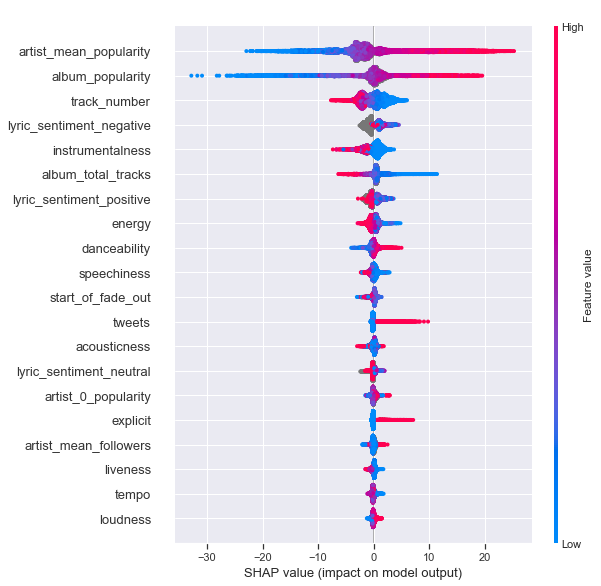

Fig 1


In [19]:
shap.summary_plot(shap_values, xTest, title=123)
print("Fig 1")

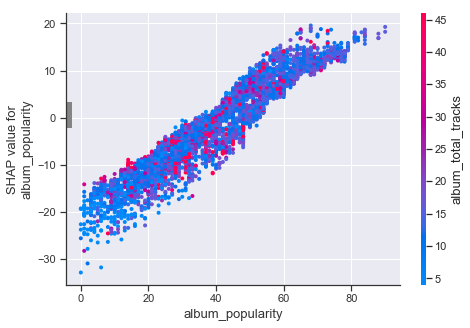

In [20]:
shap.dependence_plot("album_popularity", shap_values, xTest)

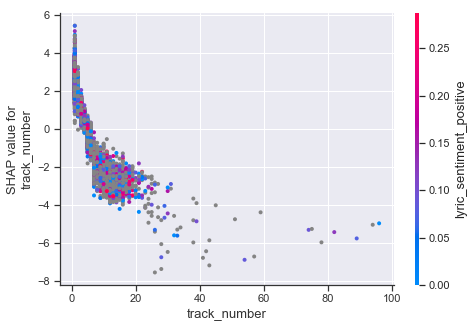

In [21]:
shap.dependence_plot("track_number", shap_values, xTest)

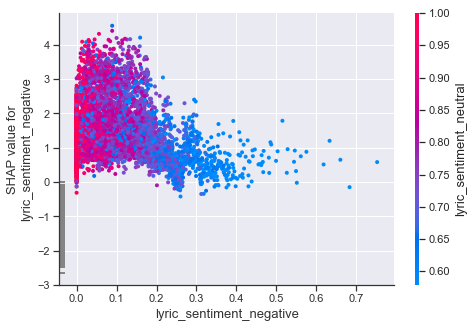

In [22]:
shap.dependence_plot("lyric_sentiment_negative", shap_values, xTest)

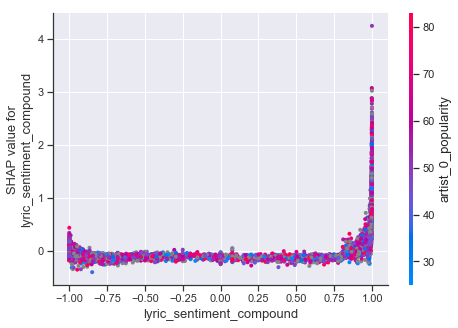

In [23]:
shap.dependence_plot("lyric_sentiment_compound", shap_values, xTest)

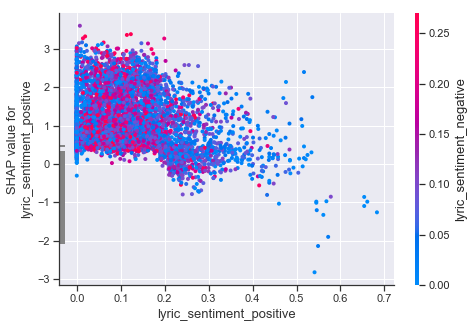

In [24]:
shap.dependence_plot("lyric_sentiment_positive", shap_values, xTest)

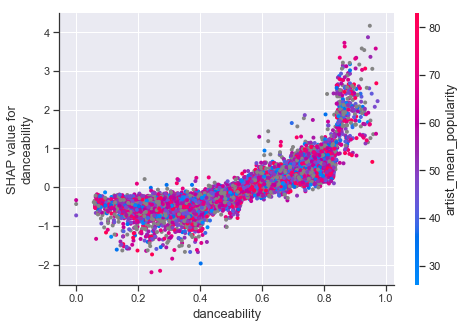

In [25]:
shap.dependence_plot("danceability", shap_values, xTest)

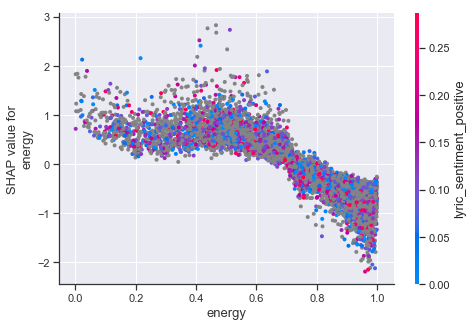

In [26]:
shap.dependence_plot("energy", shap_values, xTest, interaction_index="lyric_sentiment_positive")

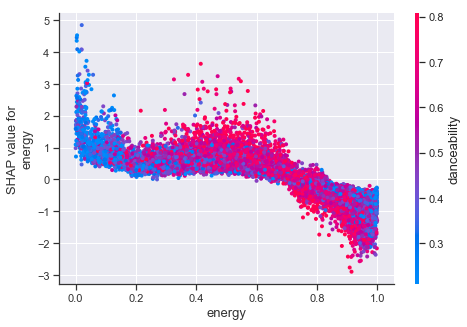

In [27]:
shap.dependence_plot("energy", shap_values, xTest, interaction_index="danceability")

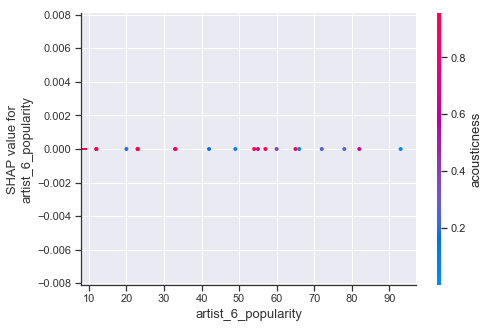

In [28]:
shap.dependence_plot("artist_6_popularity", shap_values, xTest)

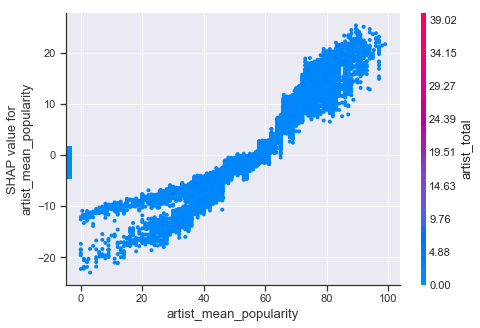

In [29]:
shap.dependence_plot("artist_mean_popularity", shap_values, xTest, interaction_index="artist_total")

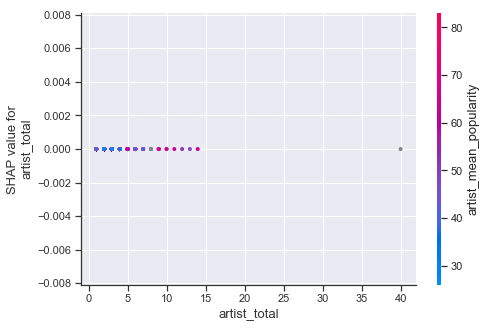

In [30]:
shap.dependence_plot("artist_total", shap_values, xTest, interaction_index="artist_mean_popularity")

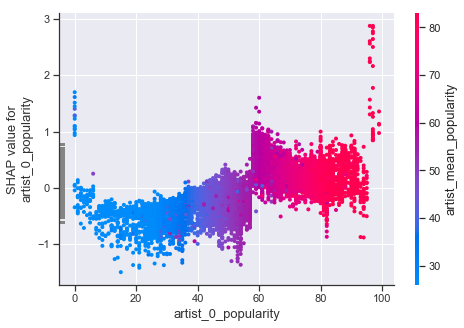

In [31]:
shap.dependence_plot("artist_0_popularity", shap_values, xTest, interaction_index="artist_mean_popularity")

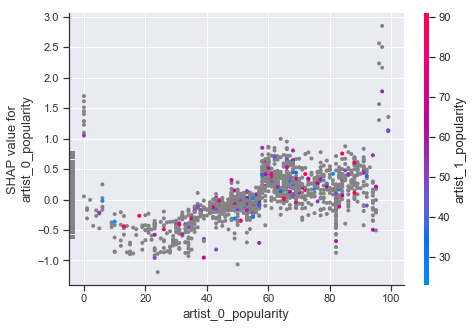

In [32]:
shap.dependence_plot("artist_0_popularity", shap_values, xTest, interaction_index="artist_1_popularity")

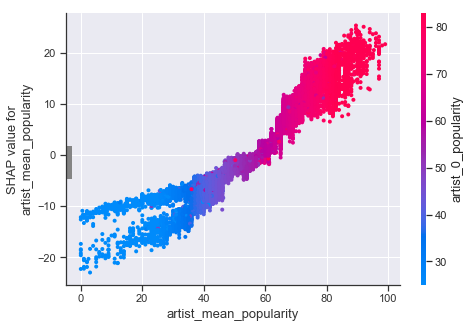

In [33]:
shap.dependence_plot("artist_mean_popularity", shap_values, xTest, interaction_index="artist_0_popularity")

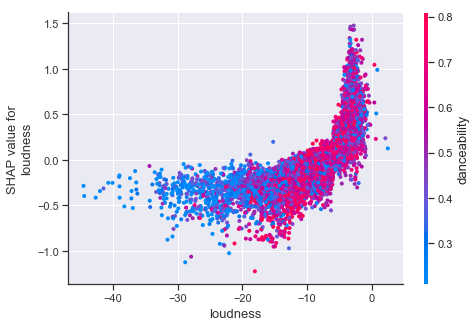

In [34]:
shap.dependence_plot("loudness", shap_values, xTest, interaction_index="danceability")